In [1]:
# Install the NetworkX
!pip install nxviz=='0.6.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the important libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import nxviz as nv
import seaborn as sns
import numpy as np

# 1. Dataset: Brazilian air traffic network

[This](https://github.com/alvarofpp/dataset-flights-brazil/tree/main/data) repository contains a network of Brazil air travel routes:

In [115]:
# Read the .graphml file to get the undirected graph
G = nx.read_graphml('/content/drive/MyDrive/Colab Notebooks/database/air_traffic.graphml')

We gonna clean the graph, only nacional air traffic is gonna be used, all international airports do not have a defined region, causing noise in the graph, making it difficult to organize the graph by region.

In [117]:
# Code to clean the graph, remove all the nodes with region not belonging to brazil
names = []
for name in G.nodes():
    if G.nodes[name]['region'] == 'nan' or G.nodes[name]['region'] == 'NÃO IDENTIFICADO' or G.nodes[name]['region'] is None:
        names.append(name)

for i in range(0, len(names)):
    G.remove_node(names[i])

The nodes in this graph are airports; two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('KJFK', 'SBPA'), ('KJFK', 'SBRF'), ('KJFK', 'SBSV'), ...]
```
where SBRF is Recife, SBSV is Salvador, etc.

These nodes also have attributes associated with them, containing additional information about the airports:

In [94]:
G.nodes['SBGL']

{'name': 'RIO DE JANEIRO',
 'country': 'BRASIL',
 'region': 'SUDESTE',
 'latitude': -22.8099994659,
 'longitude': -43.2505569458}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [95]:
G.nodes['SBGL']['name']

'RIO DE JANEIRO'

It is possible to note the number of nodes and edges.

In [118]:
G.number_of_nodes()

495

In [119]:
G.number_of_edges()

4402

# Part 1: Assortativity Graph
First we will conduct a study on the
network assortativity
considering as an attribute the
REGION where the
airport.

Then, we will generate a similar graph
considering as a group the
AIRPORT REGION.

In [98]:
# assortativity of the network based on attribute group
# value was close to 1, in other words, it is a assortative network
# similar groups tend to connect with yourselves members.
nx.attribute_assortativity_coefficient(G,"region")

0.36728130173582757

The above function was used to determine if the network is assortative or disassortative in relation to the attribute, if it is between 1 and 0 it is assortative , if it is between 0 and -1 it is disassortative.

As we can see, the network in relation to the "region" attribute is assortative.

In [99]:
# mixing matrix
# dimension of this matrix is proportional to number of groups
# in this case, 5 row and 5 coluns
e = nx.attribute_mixing_matrix(G, 'region')
e

array([[0.17446615, 0.05599727, 0.03441617, 0.02782826, 0.04009541],
       [0.05599727, 0.07882781, 0.01067697, 0.02078601, 0.01317583],
       [0.03441617, 0.01067697, 0.05224898, 0.02226261, 0.01226715],
       [0.02782826, 0.02078601, 0.02226261, 0.13584734, 0.00726942],
       [0.04009541, 0.01317583, 0.01226715, 0.00726942, 0.06905952]])


This mixing matrix refers to the relationship between the aerial lines of the regions of Brazil, ordered in alphabetical order, where the intersection of the row with the column indicates the percentage of the relationship between the regions.With it we can observe which region has a higher percentage of relationships, which are:

*   Midwest: 33.3%
*   Northeast: 17.9%
*   North: 13.2%
*   Southeast: 21.4%
*   South: 14.2%

Also, we can observe which region they relate to more, which are:

*   Midwest with Midwest: 17.5%
*   Northeast with Northeast: 7.9%
*   North with North: 5.2%
*   Southeast with Southeast: 13.6%
*   South with South: 6.9%

With this we see that the busiest airline traffic is in the midwest region, not only relating to other regions, but also to itself.

The reason for this is, as it is a central region, it has the shortest walk to any airport in the country.

In [100]:
# sum of all values of the mixing matrix
np.sum(e)

1.0

The sum of all values of matrix must be 1.0 or, in percentage, 100%, which means that the entire network was measured.

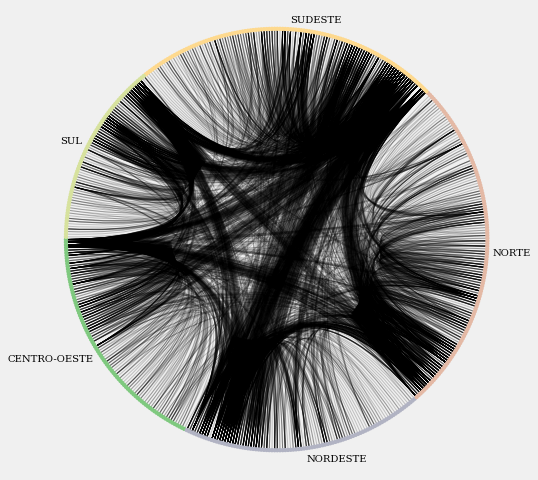

In [101]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8)
                  )

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

This is the graph considering as a group the airport region, where we can see the assortativity relationship.

# Part 2: Degree Assortativity
Continuing the work, now we will perform a bivariate analysis
between the degree of the vertex and the
average number of neighbors. 

We will generate a similar graph
considering the network of Brazil and all Regions (North, Northeast, South, Southeast and Midwest) and make a report the main findings.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


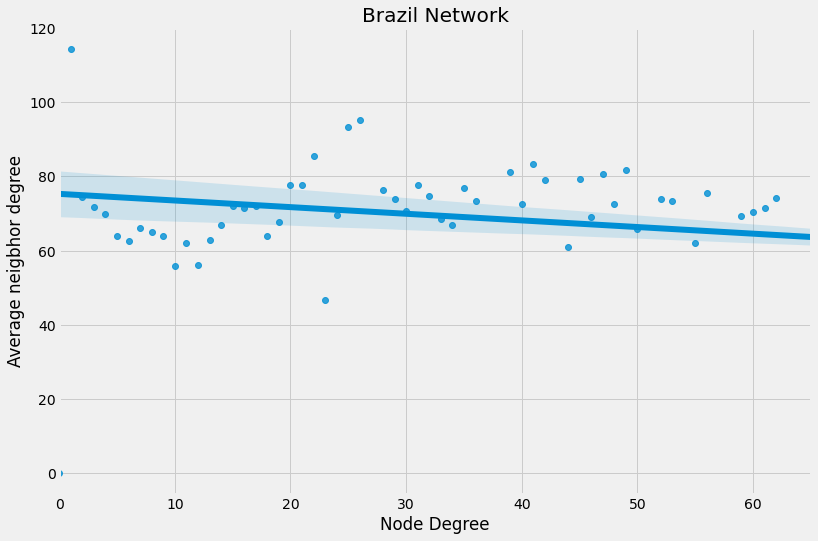

In [102]:
# Brazil network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("Brazil Network")
plt.show()

First the Brazil, from the graph we can see the higher the degree of a node, it tends to interact with nodes of lower degrees, this is evident thanks to the declining curve.

In [103]:
nx.degree_assortativity_coefficient(G)

-0.2017097172979742

The above function was used to determine if the network is assortative or disassortative in relation to the degree, if it is between 1 and 0 it is assortative , if it is between 0 and -1 it is disassortative.

As we can see, the network in relation to the degree is disassortative.

In other words, nodes with higher degrees tend to interact with nodes with lower degrees, confirming what had been verified by the graph.

In [104]:
# Create a subgraph with only the nodes with the brazil regions
def region_subgraph(G, region):
  selected_nodes = [n for n,v in G.nodes(data=True) if v['region'] == region]  
  return G.subgraph(selected_nodes)

N = region_subgraph(G, region='NORTE')
ND = region_subgraph(G, region='NORDESTE')
CO = region_subgraph(G, region='CENTRO-OESTE')
SD = region_subgraph(G, region='SUDESTE')
S = region_subgraph(G, region='SUL')

To do the bivariate analysis between the degree of the vertex and the average number of neighbors of the regions of Brazil, it is necessary to create a subgraph of each region.

Subgraph N is the North region, subgraph ND is the Northeast region, subgraph CO is the Midwest region, subgraph SD is the Southeast region, subgraph S is the South region.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


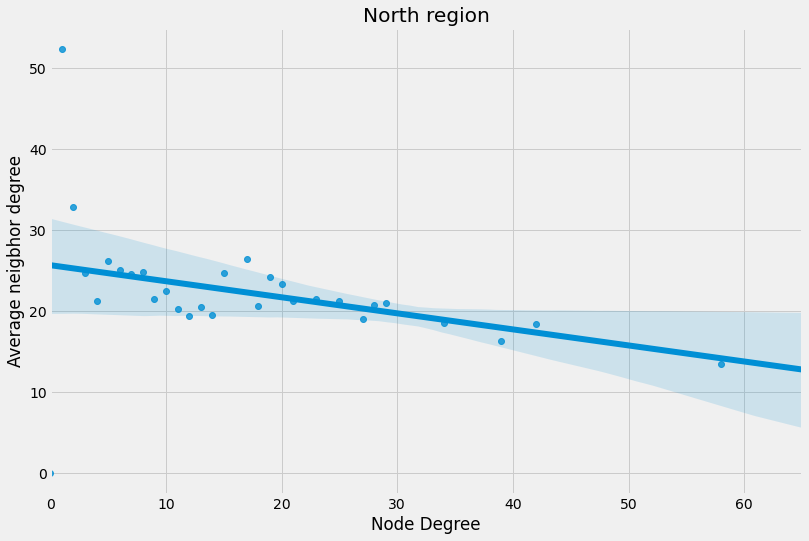

In [105]:
# North region network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(N).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_N.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("North region")
plt.show()

In [106]:
nx.degree_assortativity_coefficient(N)

-0.22193985877089423

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


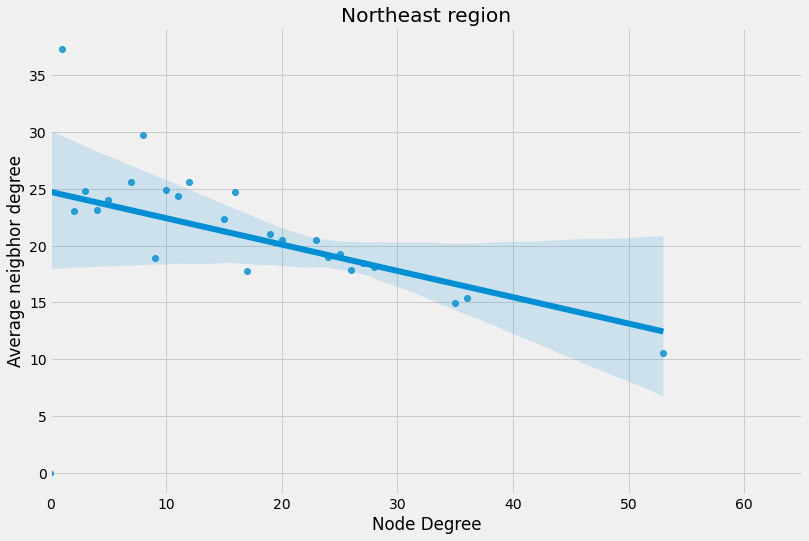

In [107]:
# Northeast region network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(ND).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_ND.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("Northeast region")
plt.show()

In [108]:
nx.degree_assortativity_coefficient(ND)

-0.33375735918340366

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


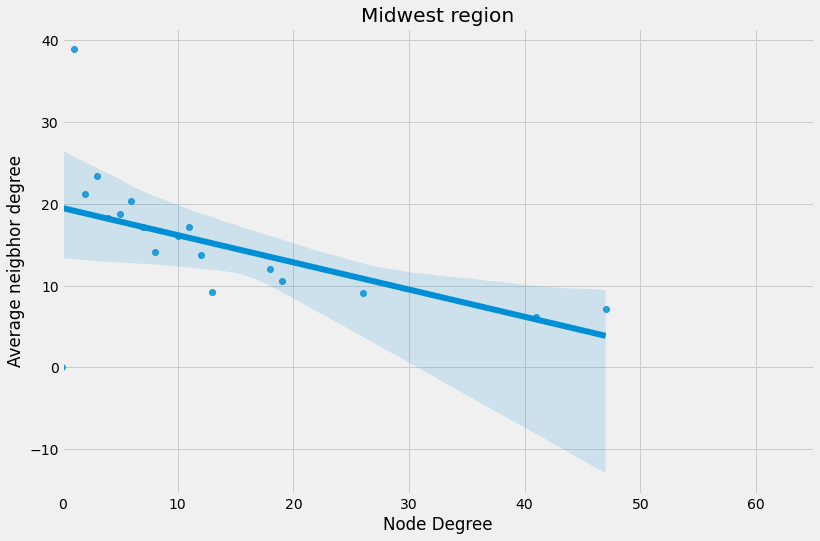

In [109]:
# Midwest region network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(CO).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_CO.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("Midwest region")
plt.show()

In [110]:
nx.degree_assortativity_coefficient(CO)

-0.3542839902086467

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


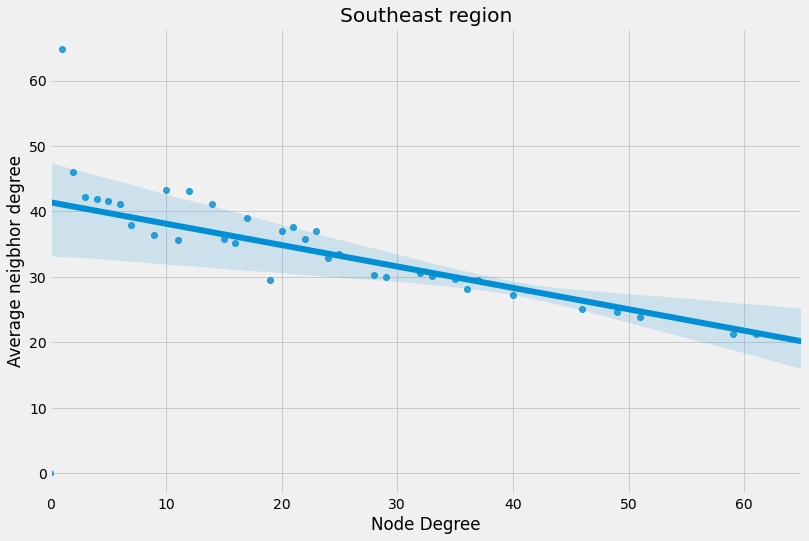

In [111]:
# Southeast region network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(SD).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_SD.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("Southeast region")
plt.show()

In [112]:
nx.degree_assortativity_coefficient(SD)

-0.3687746079424212

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


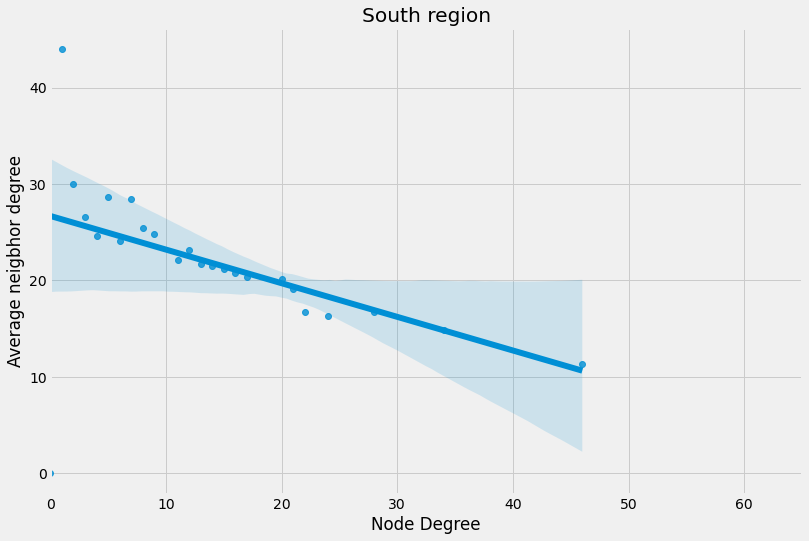

In [113]:
# South region network
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(S).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_S.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.title("South region")
plt.show()

In [114]:
nx.degree_assortativity_coefficient(S)

-0.40181381306857755

As we can see, across all regions of Brazil, they had the same behavior, nodes of higher degrees of each region interacted with nodes of lower degrees, which means that Brazilian air traffic in the country as a whole, and in its regions, are disassortative networks.

# Part 3: Connected Components
The next part of the study is finding how many connected components are there in the Brazilian air network, characterize by amount and percentage per region.

First we need to know, is the Brazil air traffic network connected or not?

In [120]:
nx.is_connected(G)

False

No, it isn't.

Now, which are the interact under all connected component of G (Brazilian air network) ?

In [121]:
for component in nx.connected_components(G):
  print(component)

{'SBMA', 'SDFR', 'SNUC', 'SJDB', 'SBCZ', 'SWJH', 'SBST', 'SDOV', 'SNPY', 'SNAB', 'SNIG', 'SBFI', 'SWPJ', 'SBMC', 'SWKC', 'SSNH', 'SNUI', 'SWVC', 'SNKI', 'SNCT', 'SBTU', 'SBUA', 'SWUA', 'SSBN', 'SWCB', 'SWNO', 'SWYN', 'SBAT', 'SJKB', 'SSOU', 'SNPJ', 'SBSI', 'SNBV', 'SNXB', 'SBAC', 'SBDO', 'SBBH', 'SBEK', 'SIQE', 'SNJO', 'SNDB', 'SNMZ', 'SBTT', 'SNXW', 'SBPM', 'SWUI', 'SBGO', 'SDAA', 'SJNP', 'SNMJ', 'SBMT', 'SBEG', 'SNAH', 'SNBA', 'SNCC', 'SBBT', 'SBPJ', 'SNNU', 'SNIP', 'SNQM', 'SSCT', 'SBFE', 'SSPK', 'SWEK', 'SNLA', 'SBCX', 'SJHG', 'SBSG', 'SWBC', 'SNAX', 'SNTI', 'SWOB', 'SNML', 'SDAM', 'SNJN', 'SSCP', 'SSSK', 'SILC', 'SWYK', 'SNLO', 'SBTB', 'SBIL', 'SBBZ', 'SBRG', 'SBUG', 'SBBU', 'SSKM', 'SWCD', 'SBNT', 'SNRU', 'SSTD', 'SWGI', 'SSAC', 'SIZX', 'SNCB', 'SNRS', 'SBAG', 'SWEU', 'SBCV', 'SNQG', 'SBFZ', 'SSOG', 'SNNG', 'SBJR', 'SBGV', 'SBSC', 'SBPI', 'SBTS', 'SBSL', 'SSNC', 'SBPA', 'SWCQ', 'SSUM', 'SNMD', 'SBNM', 'SNJK', 'SWLF', 'SNPD', 'SNNT', 'SBVG', 'SIXE', 'SNYV', 'SSDO', 'SBMY', 'SBIP',

How many connected components has the Brazilian air network?

In [122]:
nx.number_connected_components(G)

5

We can see, we have 5 connected components by the Brazilian air mesh, which 4 of the components has no connection

To get the real connected components by region, from the country as a whole and the percentage per region, we will get the connected components of each region, using the subgraphs N, ND, CO, SD, S.

Northern Brazil air mesh

In [123]:
# interact under all connected component of N (Northern Brazil air network)
for component in nx.connected_components(N):
  print(component)

{'SBMA', '1AON', 'SJLM', 'SWCQ', 'SBCZ', 'SNMD', 'SNSM', 'SBCC', 'SWBV', 'SDOW', 'SBJI', 'SNYV', 'SJTS', 'SBMY', 'SWPF', 'SWJP', 'SWEE', 'SBTU', 'SBUA', 'SWNK', 'SBMN', 'SWNO', 'SWYN', 'SWMK', 'SNTP', 'SNBV', 'SJCW', 'SBMQ', 'SNCI', 'SWGN', 'SNSW', 'SBEK', 'SWKO', 'SNDB', 'SNMZ', 'SBTT', 'SNBW', 'SNXW', 'SBGM', 'SWAE', 'SBIC', 'SBBV', 'SBPM', 'SWOW', 'SWUI', 'SSKW', 'SBBE', 'SWNA', 'SJNP', 'SBEG', 'SBJC', 'SBTK', 'SNPG', 'SWKK', 'SWMW', 'SNCC', 'SILJ', 'SWBI', 'SJLU', 'SBRB', 'SWII', 'SBPV', 'SBOI', 'SWJI', 'SWTP', 'SBYA', 'SNEB', 'SBPJ', 'SWHT', 'SWSQ', 'SWEI', 'SBPN', 'SNLA', 'SBUY', 'SWBC', 'SBAA', 'SNTI', 'SBVH', 'SWFJ', 'SWOB', 'SWQR', 'SDWQ', 'SBIH', 'SNGQ', 'SBTF', 'SWLB', 'SBTB', 'SISO', 'SNWR', 'SBHT', 'SNPV', 'SWPD', 'SBCJ', 'SDCG', 'SWJV', 'SWWD', 'SNUO', 'SWGI', 'SNFX', 'SNCB', 'SNYA', 'SNOX', 'SNVS', 'SWBR', 'SNRB', 'SJQK', 'SWFN', 'SWPC', 'SWCA', 'SWEU', 'SBAM', 'SJGU', 'SNDC', 'SNNG', 'SNSH', 'SNNC', 'SWUQ', 'SWPI', 'SBTS', 'SNKE', 'SWUY', 'SBMD', 'SBSN', 'SNMA'}
{'SBER'

In [124]:
# how many connected components has the Northern Brazil air network?
nx.number_connected_components(N)

5

Northeastern Brazil air mesh

In [125]:
# interact under all connected component of ND (Northeastern Brazil air network)
for component in nx.connected_components(ND):
  print(component)

{'SBPS', 'SNUC', 'SNDM', 'SNJK', 'SBQV', 'SNAB', 'SNIG', 'SNAV', 'SNJB', 'SNPC', 'SNBS', 'SNVV', 'SNBI', 'SNIC', 'SBLP', 'SJUR', 'SBAC', 'SNTS', 'SBLE', 'SNWS', 'SBIZ', 'SNDR', 'SNJO', 'SNBU', 'SIBU', 'SNQY', 'SBVC', 'SBSV', 'SSRS', 'SBMS', 'SNDH', 'SNMJ', 'SNAT', 'SNQD', 'SNAH', 'SBKG', 'SBPL', 'SNUU', 'SNIP', 'SNQM', 'SBFE', '2NHT', 'SNKB', 'SBSG', 'SNGI', 'SNPP', 'SBJU', 'SNML', 'SSSK', 'SBMO', 'SIRI', 'SNTF', 'SBIL', 'SBJP', 'SBUF', 'SBJE', 'SNBX', 'SWRF', 'SBRF', 'SNBR', 'SBTC', 'SBFN', 'SBNT', 'SNRU', 'SNDQ', 'SBTE', 'SNMU', 'SNKK', 'SNHS', 'SNSG', 'SBPB', 'SNVR', 'SNRS', 'SNOB', 'SDZG', 'SDLK', 'SBCV', 'SNQG', 'SBAR', 'SBFZ', 'SNQX', 'SNIU', 'SNVB', 'SWNB', 'SWBE', 'SNJD', 'SBSL'}
{'SNRJ'}
{'SBCI'}
{'SNVC'}
{'SSLS'}
{'SBTV'}


In [126]:
# how many connected components has Northeastern Brazi air network?
nx.number_connected_components(ND)

6

Midwest Brazil air mesh

In [127]:
# interact under all connected component of CO (Midwest Brazil air network)
for component in nx.connected_components(CO):
  print(component)

{'SWRP', 'SJDB', 'SWXV', 'SWJH', 'SJQP', 'SDOV', 'SWWA', 'SSDO', 'SBMC', 'SWKC', 'SWNQ', 'SWVC', '6ASO', 'SBDB', 'SWUA', 'SWTU', 'SWDM', 'SWCB', 'SWJN', 'SBAT', 'SJKB', 'SSOU', 'SBBW', 'SWYY', 'SBSI', 'SBDO', 'SWJU', 'SWGP', 'SWPY', 'SWJW', 'SBCR', 'SIQE', 'SWCP', 'SBIT', 'SWRD', 'SBCY', 'SNXL', 'SBGO', 'SWSI', 'SWDE', 'SSBB', 'SWZM', 'SWBZ', 'SWHG', 'SDNM', 'SWXM', 'SWPQ', 'SWLC', 'SWEK', 'SJHG', 'SBPP', 'SWCI', 'SWNH', 'SILC', 'SWLV', 'SWYK', 'SWIQ', 'SBBR', 'SWVR', 'SIKC', 'SBAN', 'SSND', 'SJVO', 'SBCN', 'SSNM', 'SBRD', 'SWHP', 'SBSO', 'SWWU', 'SSAC', 'SIZX', 'SBTG', 'SWMP', 'SWTS', 'SBCG', 'SWBG', 'SNMH', 'SWFE', 'SWKN', 'SWFX', 'SWDB', 'SWNS', 'SSNC'}
{'SSCL'}
{'SSBE'}
{'SWJQ'}
{'SWBU'}
{'SSTL'}
{'SWCD'}


In [128]:
# how many connected components has the Midwest Brazi air network?
nx.number_connected_components(CO)

7

Southeastern Brazil air mesh

In [129]:
# interact under all connected component of SD (Southeastern Brazil air network)
for component in nx.connected_components(SD):
  print(component)

{'SDFR', 'SWLF', 'SNPD', 'SBST', 'SDAN', 'SNPY', 'SNNT', 'SBVG', 'SBZM', 'SBIP', 'SDTK', 'SBMM', 'SBGL', 'SDCO', 'SBGP', 'SNUI', 'SNCX', 'SNGX', 'SBYS', 'SNKI', 'SNTO', 'SBUR', 'SBAQ', 'SNCT', 'SBAV', 'SNPX', 'SDUN', 'SIMK', 'SDIM', 'SNPJ', 'SBDN', 'SBRP', 'SNXB', 'SBSJ', 'SBBH', 'SBJF', 'SDTF', 'SBFC', 'SDDM', 'SNMK', 'SNAR', 'SDAA', 'SDBK', 'SBMT', 'SNZA', 'SNBA', 'SDMC', 'SBAS', 'SNJR', 'SBBT', 'SNUB', 'SDPA', 'SNNU', 'SNOS', 'SDLU', 'SIGP', 'SBAU', 'SNJM', 'SNGV', 'SNAX', 'SDZC', 'SBKP', 'SBME', 'SNGA', 'SDAM', 'SBRJ', 'SNJN', 'SIFV', 'SBAX', 'SNUH', 'SBVT', 'SNLO', 'SDRS', 'SBML', 'SJTC', 'SBBZ', 'SNBM', 'SNDT', 'SBCP', 'SNDV', 'SBBU', 'SBAE', 'SDOU', 'SBLN', 'SBJD', 'SBCB', 'SNZR', 'SDJA', 'SBAF', 'SBGR', 'SBSP', 'SDSC', 'SBAG', 'SNYB', 'SDAG', 'SBBQ', 'SNFE', 'SDVG', 'SBLS', 'SBJR', 'SBGV', 'SBSC', 'SNFO', 'SDUB', 'SBUL', 'SBPC', 'SDBB', 'SBCF', 'SBMK', 'SBSR', 'SNMX'}
{'SDVE'}
{'SSGY'}
{'SNAP'}
{'SNBG'}
{'SBPI'}


In [130]:
# how many connected components has the Southeastern Brazi air network?
nx.number_connected_components(SD)

6

Southern Brazil air mesh

In [131]:
# interact under all connected component of S (Southern Brazil air network)
for component in nx.connected_components(S):
  print(component)

{'SSCN', 'SSCT', 'SBPO', 'SSKM', 'SSVI', 'SSPK', 'SBJV', 'SSAB', 'SSLT', 'SSUM', 'SBBI', 'SSSC', 'SSTD', 'SSVL', 'SSHZ', 'SBCX', 'SBLO', 'SSEP', 'SSCC', 'SBCO', 'SBTD', 'SSZR', 'SBFL', 'SBNM', 'SBBG', 'SSPI', 'SSOE', 'SSTE', 'SBPG', 'SBTR', 'SSER', 'SSFB', 'SBCD', 'SJRG', 'SBCA', 'SSCP', 'SBFI', 'SIXE', 'SSPG', 'SSIJ', 'SSJA', 'SBLJ', 'SSNH', 'SBPF', 'SSOG', 'SBPK', 'SBCM', 'SSPB', 'SBJA', 'SBNF', 'SSBN', 'SBGU', 'SBMG', 'SBGS', 'SBCT', 'SSSB', 'SSCK', 'SBSM', 'SBMH', 'SBCH', 'SBRG', 'SBUG', 'SSUW', 'SSUV', 'SBPA'}
{'SSZW'}
{'SSCR'}
{'SBTL'}
{'SSBG'}
{'SSAE'}


In [132]:
# how many connected components has the Southern Brazi air network?
nx.number_connected_components(S)

6

In total, there are 30 connected components in all five region for brazil.
In percentage, they are separated in:

North: 16.67%

Northeast: 20%

Midwest: 23.33%

Southeast: 20%

South: 20%

Making the Midwest region the one that has the largest amount of connected components, consistent with what we had about her previously

# Part 4: Walks, Paths and Distances

To end this study, we will create a simulated scenario, where you want to make a trip with the following route:

* city 1 (North) to city 2 (South)

* city 2 (South) to city 3 (Northeast)

* city 3 (Northeast) to city 4 (Midwest)

* city 4 (Midwest) to city 5 (Southeast)

Then using the concept of the shortest path, we will describe the path taken and the number of trips taken.

We chose the city of Boa vista to be our first city, Florianopolis the second, Vera Cruz the third, Várzea Grande the fourth and Guarulhos the fifth and last.

In [133]:
# City 1 (Boa vista) to city 2 (Florianopolis)
nx.shortest_path(G,"SBBV","SBFL")

['SBBV', 'SBFL']

In [134]:
# City 2 (Florianopolis) to city 3 (Vera Cruz)
nx.shortest_path(G,"SBFL","SNVR")

['SBFL', 'SBSV', 'SNVR']

In [135]:
# City 3 (Vera Cruz) to city 4 (Várzea Grande)
nx.shortest_path(G,"SNVR","SBCY")

['SNVR', 'SBSV', 'SBCY']

In [136]:
# City 4 (Várzea Grande) to city 5 (Guarulhos)
nx.shortest_path(G,"SBCY","SBGR")

['SBCY', 'SBGR']

This is the shortest path from Boa vista to Guarulhos, passing through all the cities
```
['SBBV', 'SBFL', 'SBSV', 'SNVR', 'SBSV', 'SBCY', 'SBGR']
```

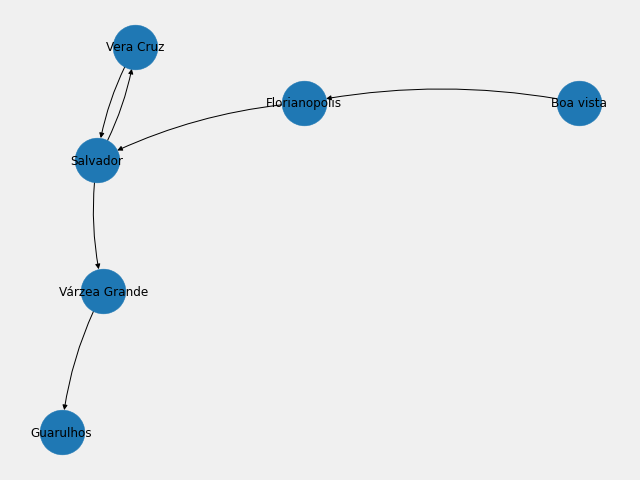

In [137]:
# Subgraph with the shortest path from Boa vista to Franca, passing through all the cities

SP = nx.DiGraph()
SP.add_edges_from(
    [('SBBV', 'SBFL'), ('SBFL', 'SBSV'), ('SBSV', 'SNVR'), ('SNVR', 'SBSV'), ('SBSV', 'SBCY'),
     ('SBCY', 'SBGR')])


labeldict = {}
labeldict["SBBV"] = "Boa vista"
labeldict["SBFL"] = "Florianopolis"
labeldict["SBSV"] = "Salvador"
labeldict["SNVR"] = "Vera Cruz"
labeldict["SBCY"] = "Várzea Grande"
labeldict["SBGR"] = "Guarulhos"

fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(SP, ax=ax, node_size=2000, labels=labeldict, connectionstyle='arc3, rad = 0.1')
plt.axis("off")

# Save figure
plt.savefig("shortest_path_scenario_all_cities.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

This directed subgraph shows the path taken to go from Boa vista to Guarulhos, we see that we passed through the same city twice (Salvador), this indicates that the path from Vera Cruz to Várzea Grande, the shortest path is passing through Salvador.

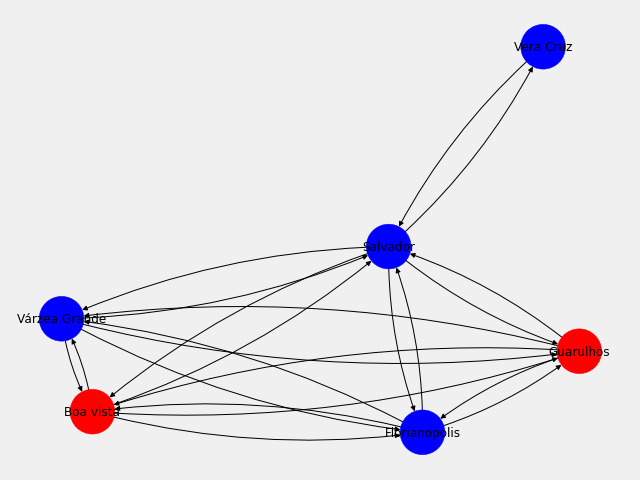

In [138]:
# Subgraph with the shortest path from Boa vista to Franca
SP = G.subgraph(['SBBV', 'SBFL', 'SBSV', 'SNVR', 'SBSV', 'SBCY', 'SBGR'])

SP = nx.DiGraph(SP)

labeldict = {}
labeldict["SBBV"] = "Boa vista"
labeldict["SBFL"] = "Florianopolis"
labeldict["SBSV"] = "Salvador"
labeldict["SNVR"] = "Vera Cruz"
labeldict["SBCY"] = "Várzea Grande"
labeldict["SBGR"] = "Guarulhos"

sp = nx.shortest_path(G,"SBBV","SBGR")

color_map = []
for node in SP:
   if node in sp:
     color_map.append('red')
   else:
     color_map.append('blue')


fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(SP, ax=ax, node_size=2000, labels=labeldict, connectionstyle='arc3, rad = 0.1', node_color=color_map)
plt.axis("off")

# Save figure
plt.savefig("shortest_path_scenario.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

But analyzing this directed subgraph, showing the cities taken to go from Boa Vista to Guarulhos in the previous path, the shortest path from Boa vista to Guarulhos it's a straight path.